In [ ]:
# URL: https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
Implementation of neural network from scratch using NumPy
"""

In [ ]:
"""
DNN(Deep neural network) is a machine learning algorithm that is inspired by the way the human brain works. 
DNN is mainly used as a classification algorithm. In this article, 
we will look at the stepwise approach on how to implement the basic DNN algorithm in NumPy(Python library) from scratch. 

The purpose of this article is to create a sense of understanding for the beginners, 
on how neural network works and its implementation details. 

We are going to build a three-letter(A, B, C) classifier, 
for simplicity we are going to create the letters (A, B, C) as NumPy array of 0s and 1s, 
also we are going to ignore the bias term related with each node. 
"""

In [ ]:
"""
Step 1 : Creating the data set using numpy array of 0s and 1s. 
As the image is a collection of pixel values in matrix, we will create those matrix of pixel for A, B, C 
"""                                                                                          

In [ ]:
# Creating data set

# A
a =[
0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1
]
# B
b =[
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0
]
# C
c =[
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0
]

# Creating labels
y =[
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]
]


In [ ]:
"""
Step 2 : Visualization of data set
"""

In [ ]:
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [ ]:
# visualizing the data, plotting A.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

In [ ]:
# visualizing the data, plotting A.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

In [ ]:
"""
Step 3 :As the data set is in the form of list we will convert it into numpy array.
"""

In [ ]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

if True:
    x =[np.array(a).reshape(1, 30), 
        np.array(b).reshape(1, 30), 
		np.array(c).reshape(1, 30)]
# OPGELET! de nieuwe numpy array moet gereshaped worden, anders foutmelding!
if False:
    x =[np.array(a), np.array(b), np.array(c)]


# Labels are also converted into NumPy array
y = np.array(y)

print(x, "\n\n", y)


In [ ]:
"""
Step 4 : Defining the architecture or structure of the deep neural network. 
This includes deciding the number of layers and the number of nodes in each layer. 
Our neural network is going to have the following structure. 
"""

In [ ]:
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(1, 3)

In [ ]:
"""
Step 5: Declaring and defining all the function to build deep neural network.
"""

In [181]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(1, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	print("output neuron node =",k)
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 

In [182]:
"""
Step 6: Initializing the weights, as the neural network is having 3 layers, 
so there will be 2 weight matrix associate with it. 
The size of each matrix depends on the number of nodes in two connecting layers. 
"""

'\nStep 6: Initializing the weights, as the neural network is having 3 layers, \nso there will be 2 weight matrix associate with it. \nThe size of each matrix depends on the number of nodes in two connecting layers. \n'

In [ ]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

In [ ]:
"""
Step 7 : Training the model.
"""

In [ ]:
"""
The arguments of train function are 
    data set list x, 
    correct labels y, 
    weights w1, w2, 
    learning rate = 0.1, 
    no of epochs or iteration.
The function will return the matrix of accuracy and loss 
and also the matrix of trained weights w1, w2
"""

# acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100) # max 95 accuracy
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 850) # max 99,9 accuracy
# acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 1000) # max 99,99 accuracy


In [ ]:
"""
Step 8 : Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration). 
"""

In [ ]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [ ]:
"""
Getting the weights of the trained model
"""

In [ ]:
# the trained weights are
print(w1, "\n", w2)

In [ ]:
"""
Step9: Making prediction.
"""

In [ ]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
# finding letter A
predict(x[0], w1, w2)


In [ ]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
# finding letter B
predict(x[1], w1, w2)


In [ ]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
# finding letter C
predict(x[2], w1, w2)


In [ ]:
"""
Try-out with adapted values of the image matrices for letters A, B and C
"""

In [ ]:
# Creating data set

# A
a =[
0, 1, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 0, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 1, 1
]
# B
b =[
0, 1, 0, 1, 1, 1,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 0, 0
]
# C
c =[
1, 1, 0, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0
]

# Creating labels
y =[
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]
]


In [ ]:
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [ ]:
# visualizing the data, plotting B.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

In [ ]:
# visualizing the data, plotting C.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

In [183]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]

# Labels are also converted into NumPy array
y = np.array(y)

print(x, "\n\n", y)


[array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1]]), array([[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0]]), array([[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


output neuron node= 0
Image is of letter A.


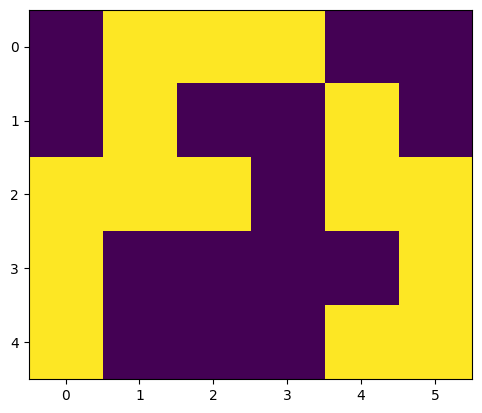

In [184]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
# finding letter A (distorted image)
predict(x[0], w1, w2)


output neuron node= 1
Image is of letter B.


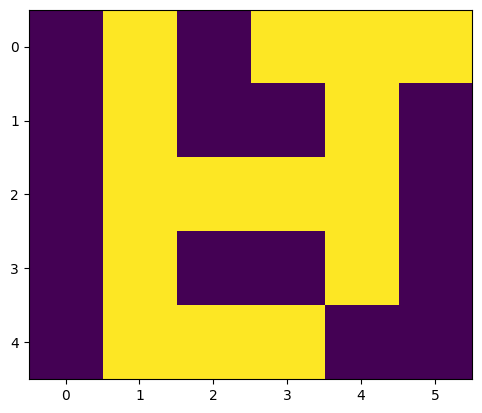

In [185]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
# finding letter B (distorted image)
predict(x[1], w1, w2)


output neuron node= 2
Image is of letter C.


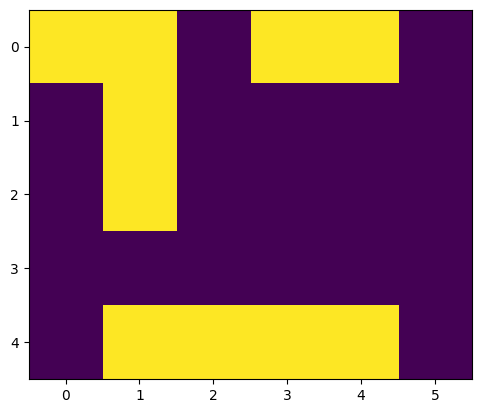

In [186]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
# finding letter C (distorted image)
predict(x[2], w1, w2)
